In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as pyplot
import numpy as np

#**Assignment 2: Convolutional Neural Network**

##**Data**

Data: CIFAR-10

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 **color images** containing one of 10 object classes, with 6000 images per class.

Labels are as follows:

airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9)

Source: https://www.kaggle.com/c/cifar-10

### Q1. This dataset has been included in **keras.datasets.cifar10**. Please load the dataset and print the shape of training and testing sets.

In [23]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Print the shape of the training and testing sets
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### Q2. Convert the target labels (y) into the one-hot format and show the value (y) for the first instance of the training dataset.

In [24]:
y_train_categorical = keras.utils.to_categorical(train_labels,10)
y_test_categorical = keras.utils.to_categorical(test_labels,10)
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Q3. Create a validation dataset using the first 5,000 instances in the training dataset. Also, divide all input features (X values) in the train/test/validation sets by 255.0. Please show the y value for the first instance of the validation dataset.

In [25]:
X_valid = train_images[:5000]/255.0
X_train = train_images[5000:]/255.0
X_test = test_images/255.0
y_valid = y_train_categorical[:5000]
y_train = y_train_categorical[5000:]


y_valid[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## **Model**

### Q4. Create a convolutional neural network with 32 kernels of size 3 by 3 in the first layer and 64 kernels of size 3 by 3 in the second layer. We need a max pooling layer wth the size of 2 after each convolution layer. After flattening the feature maps add a fully-connected layer with 128 nodes for the final prediction. Please print the model summary.

### Please note that the input images are color images with the shape of **32 * 32 * 3**. Here 3 shows RGB.

In [31]:
from keras import models
from keras.models import Sequential
from keras.layers import InputLayer, MaxPooling2D, Conv2D, Dense, Flatten

model = Sequential()
model.add(InputLayer((32,32,3)))
model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same', activation='relu', name='layer_conv1'))# 32filters*(3*3*3channel)+32bias=896 each filter add 1 bias term
model.add(MaxPooling2D(pool_size=2, strides=2, name='pooling1'))
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same', activation='relu', name='layer_conv2'))# 64filter*(3*3*32channel)+64bias=18496
model.add(MaxPooling2D(pool_size=2, strides=2, name='pooling2'))
model.add(Flatten(name='Flatten'))# 8*8*64=4096
model.add(Dense(128, activation='relu', name='fully-connected'))# 4096*128 +128bias = 524416 
model.add(Dense(10,activation='softmax', name='output'))# 128+10+10 = 1290

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_conv1 (Conv2D)        (None, 32, 32, 32)        896       
                                                                 
 pooling1 (MaxPooling2D)     (None, 16, 16, 32)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 16, 16, 64)        18496     
                                                                 
 pooling2 (MaxPooling2D)     (None, 8, 8, 64)          0         
                                                                 
 Flatten (Flatten)           (None, 4096)              0         
                                                                 
 fully-connected (Dense)     (None, 128)               524416    
                                                                 
 output (Dense)              (None, 10)               

### Q5. Create an Adam optimizer with a learning rate of 0.001, compile the model, and fit it on the training and validation datasets. Use the following hyperparameters: **batch_size=512, epochs=5**.

### *Hint*: Adam optimizer can be imported by **keras.optimizers.Adam(learning_rate=0.001)**

In [34]:
learning_rate = 1e-3
batch_size=512
epochs=1

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [35]:
train_model = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, \
                        validation_data=(X_valid, y_valid))

88/88 [==============================] - 11s 122ms/step - loss: 1.7683 - accuracy: 0.3866 - val_loss: 1.4914 - val_accuracy: 0.4832


Epoch 1/5
88/88 [==============================] - 68s 768ms/step - loss: 1.8177 - accuracy: 0.3522 - val_loss: 1.5299 - val_accuracy: 0.4560
Epoch 2/5
88/88 [==============================] - 78s 879ms/step - loss: 1.4220 - accuracy: 0.4950 - val_loss: 1.3158 - val_accuracy: 0.5382
Epoch 3/5
88/88 [==============================] - 69s 789ms/step - loss: 1.2663 - accuracy: 0.5542 - val_loss: 1.1966 - val_accuracy: 0.5814
Epoch 4/5
88/88 [==============================] - 68s 770ms/step - loss: 1.1651 - accuracy: 0.5928 - val_loss: 1.1605 - val_accuracy: 0.5882
Epoch 5/5
88/88 [==============================] - 69s 789ms/step - loss: 1.1095 - accuracy: 0.6159 - val_loss: 1.0957 - val_accuracy: 0.6164


## **Performance**

### Q6. Evaluate your model.

In [9]:
model.evaluate(X_test, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.0805 - accuracy: 0.6234


[1.0805078744888306, 0.6233999729156494]

## **Post-analysis**

### Q7. Print the name of layers.

#### Note: You may choose any name you like for your layers.

In [36]:
layer_names = [layer.name for layer in model.layers]
layer_names

['layer_conv1',
 'pooling1',
 'layer_conv2',
 'pooling2',
 'Flatten',
 'fully-connected',
 'output']

['conv1', 'pooling1', 'conv2', 'pooling2', 'flat', 'fully-connected', 'output']

### Q8. Print the output of layers.

In [37]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'layer_conv1')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'pooling1')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'layer_conv2')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'pooling2')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'Flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'fully-connected')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output')>]

### Q9. Print the output shape of feature maps in the convolution layers as well as the pooling layers for the fifth instance in your test dataset.

In [45]:
feature_maps

[array([[[[0.00000000e+00, 0.00000000e+00, 1.33104488e-01, ...,
           4.14698794e-02, 1.92020461e-01, 5.92285059e-02],
          [1.13203257e-01, 0.00000000e+00, 1.30641267e-01, ...,
           7.71754533e-02, 1.02246135e-01, 1.88495263e-01],
          [8.06810856e-02, 0.00000000e+00, 1.63233042e-01, ...,
           9.89296883e-02, 1.16713814e-01, 1.29445508e-01],
          ...,
          [7.86575824e-02, 0.00000000e+00, 1.18012205e-01, ...,
           5.20777851e-02, 7.74402842e-02, 1.22069806e-01],
          [5.80319241e-02, 0.00000000e+00, 1.07956961e-01, ...,
           4.36186232e-02, 7.05739707e-02, 9.21584293e-02],
          [1.00528851e-01, 0.00000000e+00, 2.31745448e-02, ...,
           0.00000000e+00, 6.14291057e-02, 5.90992868e-02]],
 
         [[0.00000000e+00, 1.18354093e-02, 1.74497232e-01, ...,
           1.47093505e-01, 1.27877191e-01, 6.09552711e-02],
          [1.11565262e-01, 5.82816452e-02, 3.74456912e-01, ...,
           1.20898806e-01, 4.24738862e-02, 1.36147

In [49]:
feature_map_model = models.Model(inputs=model.input, outputs=layer_outputs)
feature_maps = feature_map_model.predict(X_test[4].reshape(1,32,32,3))

for fmap in feature_maps:
    #print(fmap.shape)
    if len(fmap.shape) == 4:
        print(fmap.shape)

1/1 [==============================] - 0s 75ms/step
(1, 32, 32, 32)
(1, 16, 16, 32)
(1, 16, 16, 64)
(1, 8, 8, 64)


The frog image below should be your fifth testing instance (index=4).

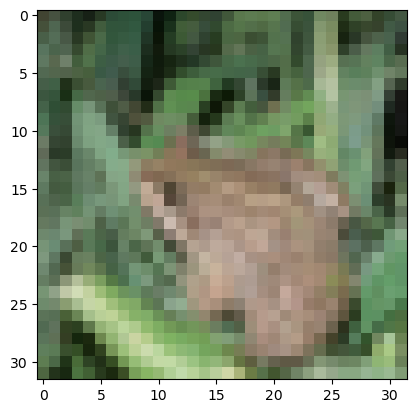

In [50]:
pyplot.subplot()
pyplot.imshow(X_test[4], cmap=pyplot.get_cmap('Greys'))

pyplot.rcParams["figure.figsize"] = (10,5)
pyplot.show()

### Q10. Draw 16 feature maps for each convolution and pooling layer.

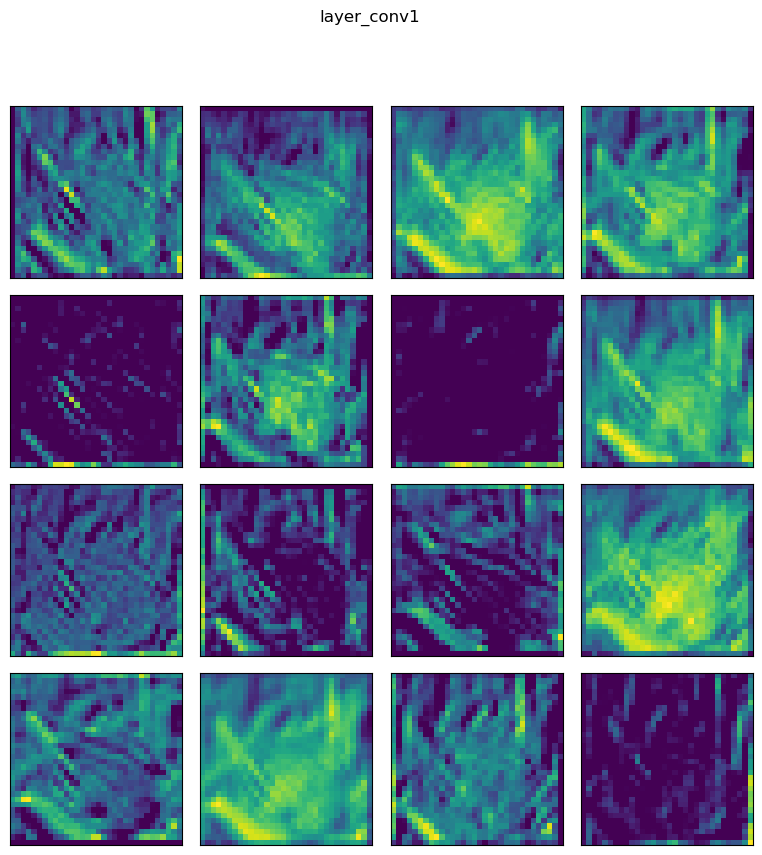

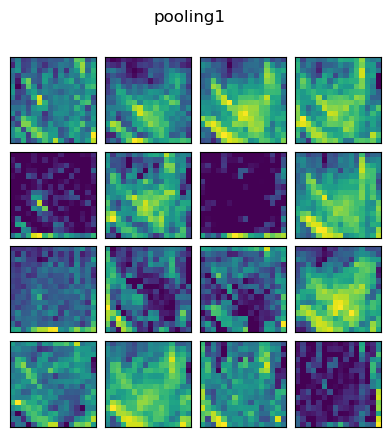

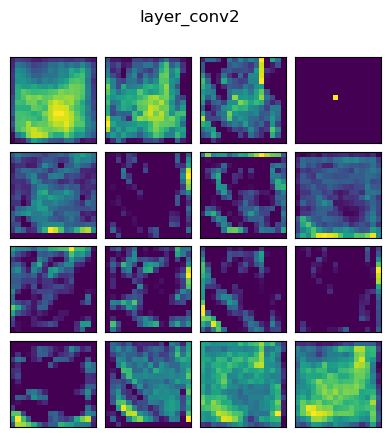

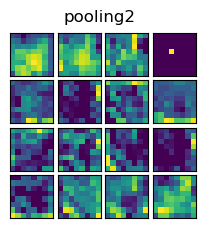

In [51]:
for layer_name, fmap in zip(layer_names, feature_maps):   
  if len(fmap.shape) == 4:
    size = fmap.shape[1]
    scale = 0.3
    fig, axes = pyplot.subplots(4, 4, figsize=(size*scale,size*scale))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    fig.suptitle(layer_name)

    for i in range(16):
        axes.flat[i].imshow(fmap[0, :, :, i], cmap=pyplot.get_cmap('viridis'))
        axes.flat[i].set_xticks([])
        axes.flat[i].set_yticks([])

  pyplot.show()

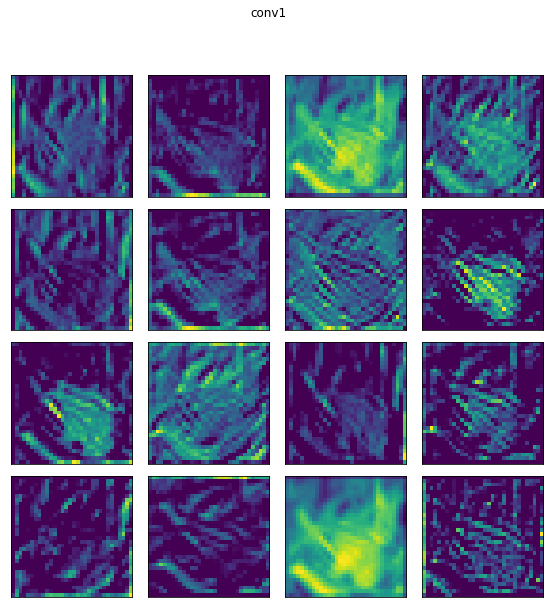

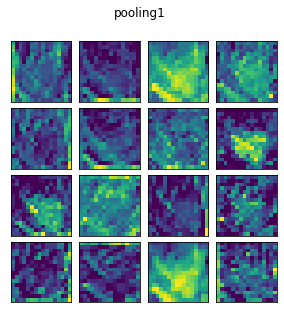

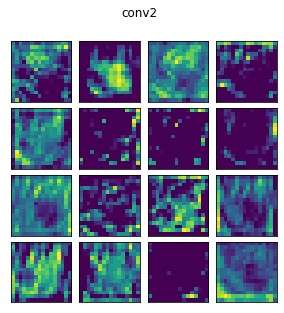

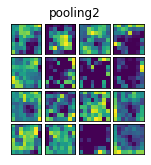